# __Learning X2K: Genetic Algorithm Results__

## __Import data__

In [31]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

import numpy as np
import matplotlib.pyplot as plt
import os
import Python_scripts.Extra_X2K_functions as Ex
root = '/Users/schilder/Desktop/X2K_Genetic_Algorithm'
root = os.getcwd()
picFormat='png'

# Data   
#GA_output_name = 'GA_results.100pop.10gen.GEO.run3.npy' #
#GA_output_name = 'GA_results.100pop.10gen.L1000-DRH.npy' #
#GA_output_name = 'GA_results_L1000-DRH.rboScore.npy' #
#GA_output_name = 'GA_results_GEO.RankWeightedMean.npy'
#GA_output_name = 'GA_results_GEO.wPPIlimiters.npy'
#GA_output_name = 'GA_results_GEO.wPPIlimiters_20gen.npy'
#GA_output_name = "GA_results_GEO.wPPIlimiters_20gen-try2.npy"
#GA_output_name = 'GAresults_GEO_Tournament.RBO.randCrossover.npy'\
#GA_output_name = 'GAresults_GEO_Tournament.TAO.randCrossover.npy'
#GA_output_name = 'allKinases_randomGenes.npy'
#GA_output_name = 'allKinases_randomGenes-PKlengthCorrected.npy'
GA_output_name = 'GAresults_GEO-PKlengthCorrected.npy'



results_file = root+'/GA_Results/GEO/'+GA_output_name
#results_file = root+'/GA_Results/L1000_DRH/'+GA_output_name
#results_file = root+'/GA_Results/randomGMTs/'+GA_output_name


Subset1_df, Subset2_df, GAsettings  = np.load(results_file)
# Make folder for saved images
figDir = 'Figures/'+GA_output_name
if not os.path.exists(figDir):
    os.makedirs(figDir)

#display(Subset1_df)

## __GA Settings__

In [32]:
GAsettings

{'binaryStringLength': 43,
 'breedingVariation': 0,
 'childrenPerGeneration': 90,
 'crossoverLocations': 'random',
 'crossoverPoints': 5,
 'fitnessMethod': 'targetAdjustedOverlap_outputLengthCorrection',
 'includeFittestParents': 10,
 'initialPopSize': 100,
 'mutationRate': 0.01,
 'numberOfGenerations': 20,
 'selectionMethod': 'mixedTournament',
 'setInitialPopulation': False,
 'topNum': 10}

## Report Peak Fitnesses

In [33]:
print('Peak fitness for Subset1 = '+str(round(Subset1_df.Fitness.max(),2)))
print('Peak fitness for Subset2 = '+str(round(Subset2_df.Fitness.max(),2))+'\n')
print("===============================\n")

print('OPTIMIZED PARAMETERS:')
fittestDF = Subset1_df.sort_values(by=['Fitness'], ascending=False).iloc[:10, :]
data = Ex.parameterDF(fittestDF)
uniqueOptimizations = data.iloc[:,4:].drop(['uniqueID'], axis=1).drop_duplicates()
print(uniqueOptimizations.transpose())

Peak fitness for Subset1 = 0.95
Peak fitness for Subset2 = 1.26


OPTIMIZED PARAMETERS:
                                                                   0
Fitness                                                     0.954536
baselineFitness                                             0.138504
PPI_size                                                      386.89
CHEA_parameters               run;rank;mouse;transfac;humanarchs4;30
G2N_parameters     run;BIND,BIOCARTA,DIP,HPRD,INNATEDB,INTACT,PDZ...
KEA_parameters                             run;rank;humanarchs4;P;20
targetKinases      IGF1R;FGFR3;IGF1R;FGFR3;HUNK;PDGFRA;ERBB2;RAF1...
predictedKinases   MAPK8,AKT1,CSNK2A1,ABL1,CSK,CDK2,CDK5,PRKCD,MA...
TF_sort                                                         rank
TF_species                                                     mouse
TF_databases                                                transfac
TF_background                                            humanarchs4
TF_topTFs      

## __Overfitting Tests__

### Test Overfitting

In [34]:
import pandas as pd
lm_data = pd.DataFrame({'trainingFitness':Subset1_df.Fitness, 'testFitness':Subset2_df.Fitness})
## Get OLS R2
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('testFitness ~ trainingFitness',data=lm_data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
p = aov_table['PR(>F)'][0]
mod.summary()

print(aov_table)
print("************************************************************************")
if p>0.05:
    print('Training and Test runs do NOT significantly differ.')
else:
    print('Training and Test runs DO significantly differ');

                    sum_sq      df           F        PR(>F)
trainingFitness   5.728248     1.0  225.904127  1.871663e-48
Residual         50.663257  1998.0         NaN           NaN
************************************************************************
Training and Test runs DO significantly differ


### Average & Peak Fitness 

TypeError: subplots_adjust() got an unexpected keyword argument 'right'

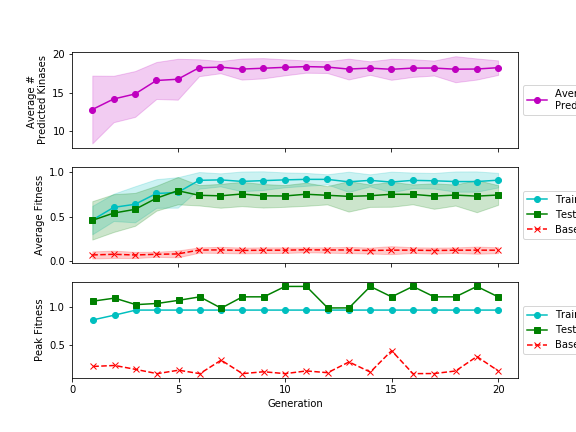

In [35]:
plt.rcParams["figure.figsize"] = (8,6)
Ex.plotFitness(Subset1_df, Subset2_df, barsOrFill="fill")
plt.subplots_adjust(right=0.6)

plt.savefig(figDir+'/FitnessSubplots.'+picFormat, format=picFormat, dpi=1000);

### Plot the distribution of ALL fitnesses in sampling of generations

In [21]:
Ex.fitnessHistogramCurves(Subset1_df, genSpacing=4)
#plt.ylim([0,.3])
#plt.xlim([0,35])
plt.legend(loc='upper left')


plt.savefig(figDir+'/KDEfitnessPlot.'+picFormat, format=picFormat, dpi=1000);
# EPS format doesn't support transparency. Have to save as png instead.

## __4. X2K Parameters vs. Fitness Analyses__

### Plot Fitness and Parameter Evolution Over Time

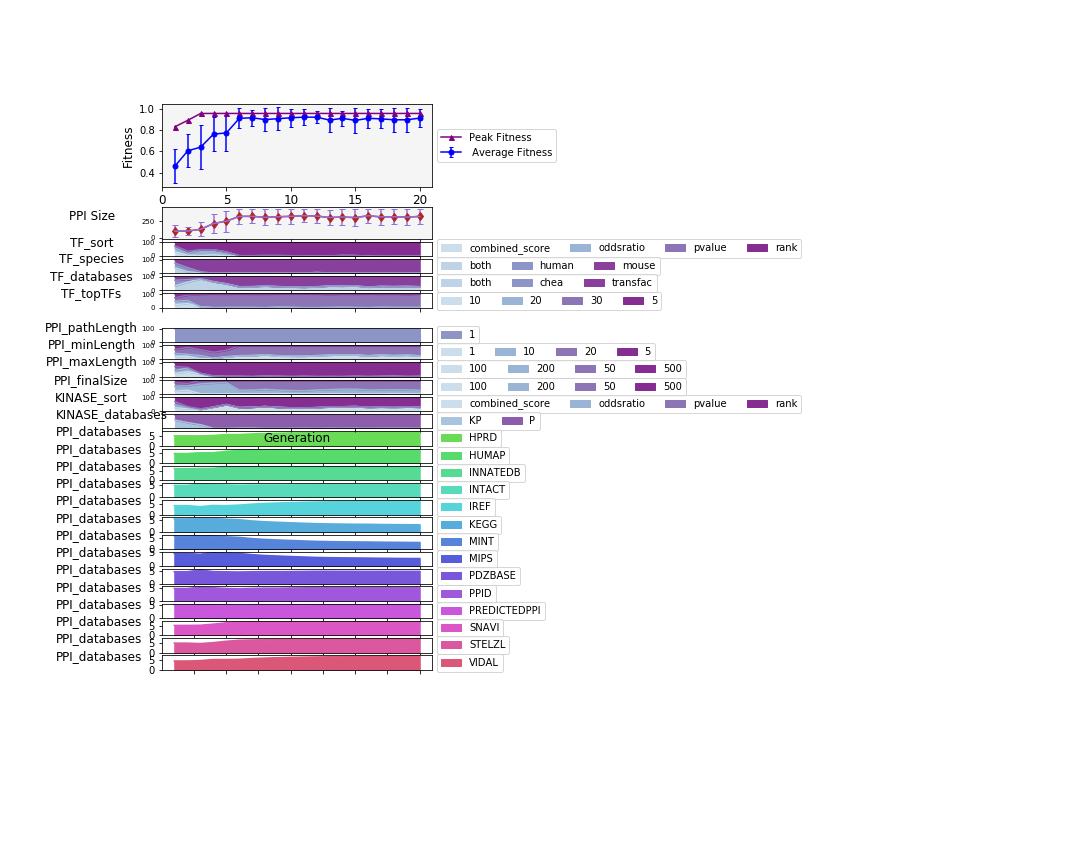

In [12]:
Ex.parameterEvolutionPlot(Subset1_df,figsize=(15,12), padRight=.4, padLeft=.15)

plt.savefig(figDir+'/ParamEvolution.'+picFormat, format=picFormat, dpi=1000);

### Plot Select X2K Parameters vs. Fitness

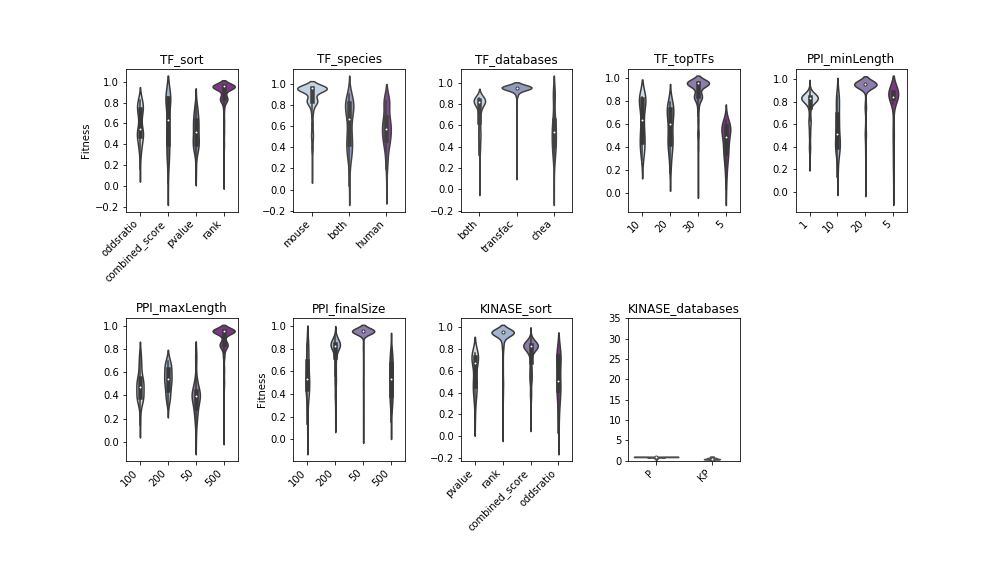

In [12]:
Ex.ParameterViolinPlots(Subset1_df, numRows=2, numCols=5, figSize=(14,8))
plt.ylim([0,35])
plt.gcf().set_facecolor('white');

plt.savefig(figDir+'/Parameters.Vs.Fitness.'+picFormat, format=picFormat, dpi=1000);

### One-way ANOVAs: Each parameter vs. Fitness

In [13]:
Ex.parameterStats(Subset1_df, writeExcel=figDir+"/Parameter.v.Fitness_ANOVA.table.xlsx")
#plt.savefig(figDir+'/Parameter.v.Fitness_ANOVA.table.eps', format='eps', dpi=1000)

Writing AOV results to excel file...


***** Fitness.Vs.Parameters *****

***** Fitness.Vs.baselineFitness *****


(      X2K Parameter  SS   DF F-value   P-value  Sig.
 0          PPI_size  38    1    3815  < 0.0001  ****
 0           TF_sort  19    3     319  < 0.0001  ****
 0      TF_databases  25    2     734  < 0.0001  ****
 0         TF_topTFs  16    3     250  < 0.0001  ****
 0     PPI_databases  53  253      59  < 0.0001  ****
 0     PPI_minLength  13    3     202  < 0.0001  ****
 0     PPI_maxLength  30    3     721  < 0.0001  ****
 0     PPI_finalSize  23    3     429  < 0.0001  ****
 0       KINASE_sort  15    3     235  < 0.0001  ****
 0  KINASE_databases  17    1     855  < 0.0001  ****,
   Generation SS DF F-value   P-value     Sig.
 0          1  0  1      12   < 0.001      ***
 0          2  0  1       0    ≥ 0.05  non-sig
 0          3  0  1       1    ≥ 0.05  non-sig
 0          4  0  1      12   < 0.001      ***
 0          5  0  1      19  < 0.0001     ****
 0          6  0  1      67  < 0.0001     ****
 0          7  0  1      59  < 0.0001     ****
 0          8  0  1      53  